In [2]:
#!git clone --depth=1 https://github.com/geadalfa/twint.git

In [3]:
#cd twint

In [ ]:
# !pip install . -r requirements.txt

# Import Library

In [3]:
#Crawling
import twint  # import library twint
import nest_asyncio # pip install nest_asyncio 
import json
import time
nest_asyncio.apply() # prevent event loop to be nested
import requests

# Preprocessing
import pandas as pd
pd.set_option('max_colwidth', 5000)
import numpy as np
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords

# Visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # Untuk menampilkan kata-kata yang sering muncul melalui gambar
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alfa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alfa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alfa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
twi = twint.Config()
#twi.Search = 'Depok OR kesehatan OR rs OR rumah sakit'
#twi.Search = 'Depok OR Kesehatan OR rs'#, 'rumah sakit'#, 'rumah sakit'
#twi.Search = 'Depok', 'puskesmas OR pskms'#, 'rumah sakit'
twi.Search = 'Depok', 'covid OR korona OR corona'
#twi.Search = 'Depok OR dpk', 'sanitasi OR kebersihan OR lingkungan'
twi.Lang = 'in'
twi.Until = '2021-03-30'
twi.Since = '2020-1-1'
#twi.Geo = "-6.406954, 106.794451,100km"51,100km"
twi.Limit = 10000
Pandas = True
twi.Custom["tweet"] = ["id", "date", "username", "tweet"]
#twi.Output = "kesehatan_fix.csv"
twi.Store_csv = True
twint.run.Search(twi)

1376679586717560832 2021-03-30 06:36:05 +0700 <agfiansyah> @fathiafifmhsn Negara wkwkwLAND emang suka bikin acara ga jelas buang² anggaran  3 orang kena korona di depok city  pas sembuh dirayain dipikir korona langsung hilang kali🤣🤣
1376666996616568833 2021-03-30 05:46:03 +0700 <kompascom> Pemerintah Kota Depok mencatat ada 56 kasus baru Covid-19, 218 pasien pulih, dan sembilan warga meninggal akibat Covid-19 dalam sehari.  https://t.co/XKWJyTVu80
1376632223621734400 2021-03-30 03:27:53 +0700 <muhanangfaizin> prokas prokes yo mung gimmick, acara neng kelurahan condong catur kemruyuk yo do nyantai wae petugas2 e.  tracking corona ra jelas, seko rs dikon swab jare gratis, ketuk Puskesmas Depok 2 mung kon rapid ngko kon NUNGGU UNDANGAN SWAB sik seko desember sampai tweet ini dibuat....
1376534175956656129 2021-03-29 20:58:16 +0700 <mediaserunicoid> Wakil Wali Kota Depok, Imam Budi Hartono berharap Jawa Barat Culture and Tourism Festival (JaFest) 2021 dapat membantu memulihkan ekonomi di m

In [4]:
df = pd.read_csv('kesehatan_fix.csv')

In [5]:
df.tail()

,id,date,username,tweet
9997,1268505351759867904,2020-06-04,mediaindonesia,Bahkan Kota Depok masuk level 3 penyebaran covid-19 di Jawa atau masih dalam kategori cukup berat. https://t.co/FhWWfAD28R
9998,1268500274534068224,2020-06-04,depokinfo_,#News: Ini Alasan FPKS Tolak Pansus Covid-19 https://t.co/JgIu1xcjC4 | Depok News
9999,1268491818389233664,2020-06-04,bebekg0rengg,hy ada yg dom depok ga beres Corona meet up yuyuyuyu😁✊🏿
10000,1268483155087908866,2020-06-04,ahi_yuen,PKPI halal bi halal bersama rakyat!! pembukaan dapur umum PKPI hari ke 4 mendistribusikan 250 box makanan siap saji untuk meringankan masyarakat di 5 kecamatan di DEPOK yg terkena dampak COVID 19 semoga bermanfaat &amp; berkah @dHendropriyono @edo751945 @jokowi @vhendrawan @pkpi_id https://t.co/TNF4IQA4Q9
10001,1268472634758451201,2020-06-04,pawtawin,"@brightuuin ak ke UI open days lanjut ke margocity depok trus malemnya di infoin kasus covid pertama ada di depok, bikin agak panik😁👍🏻"


# Preprocessingg

In [6]:
# Merubah menjadi huruf kecil
df['cleaned_tweets'] = df['tweet'].apply(lambda x: x.lower())
df.tail()

,id,date,username,tweet,cleaned_tweets
9997,1268505351759867904,2020-06-04,mediaindonesia,Bahkan Kota Depok masuk level 3 penyebaran covid-19 di Jawa atau masih dalam kategori cukup berat. https://t.co/FhWWfAD28R,bahkan kota depok masuk level 3 penyebaran covid-19 di jawa atau masih dalam kategori cukup berat. https://t.co/fhwwfad28r
9998,1268500274534068224,2020-06-04,depokinfo_,#News: Ini Alasan FPKS Tolak Pansus Covid-19 https://t.co/JgIu1xcjC4 | Depok News,#news: ini alasan fpks tolak pansus covid-19 https://t.co/jgiu1xcjc4 | depok news
9999,1268491818389233664,2020-06-04,bebekg0rengg,hy ada yg dom depok ga beres Corona meet up yuyuyuyu😁✊🏿,hy ada yg dom depok ga beres corona meet up yuyuyuyu😁✊🏿
10000,1268483155087908866,2020-06-04,ahi_yuen,PKPI halal bi halal bersama rakyat!! pembukaan dapur umum PKPI hari ke 4 mendistribusikan 250 box makanan siap saji untuk meringankan masyarakat di 5 kecamatan di DEPOK yg terkena dampak COVID 19 semoga bermanfaat &amp; berkah @dHendropriyono @edo751945 @jokowi @vhendrawan @pkpi_id https://t.co/TNF4IQA4Q9,pkpi halal bi halal bersama rakyat!! pembukaan dapur umum pkpi hari ke 4 mendistribusikan 250 box makanan siap saji untuk meringankan masyarakat di 5 kecamatan di depok yg terkena dampak covid 19 semoga bermanfaat &amp; berkah @dhendropriyono @edo751945 @jokowi @vhendrawan @pkpi_id https://t.co/tnf4iqa4q9
10001,1268472634758451201,2020-06-04,pawtawin,"@brightuuin ak ke UI open days lanjut ke margocity depok trus malemnya di infoin kasus covid pertama ada di depok, bikin agak panik😁👍🏻","@brightuuin ak ke ui open days lanjut ke margocity depok trus malemnya di infoin kasus covid pertama ada di depok, bikin agak panik😁👍🏻"


In [7]:
# Implementasi Regular Expression untuk menghapus simbol dan emoji
def normalisasi(text):
    text = text.encode('ascii', 'replace').decode('ascii') # remove non ASCII (emoticon, chinese word, .etc)
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"@\w+", " ", text)
    text = re.sub(r"#\w+", " ", text)
    text = re.sub(r'\W', " ", text)
    text = re.sub(r"\d+", "", text)    
    text = re.sub(r'_', ' ',text)
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"^\s+", '', text)
    #text = text.lstrip()
    return text

df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: normalisasi(x))
df.tail(2)

,id,date,username,tweet,cleaned_tweets
10000,1268483155087908866,2020-06-04,ahi_yuen,PKPI halal bi halal bersama rakyat!! pembukaan dapur umum PKPI hari ke 4 mendistribusikan 250 box makanan siap saji untuk meringankan masyarakat di 5 kecamatan di DEPOK yg terkena dampak COVID 19 semoga bermanfaat &amp; berkah @dHendropriyono @edo751945 @jokowi @vhendrawan @pkpi_id https://t.co/TNF4IQA4Q9,pkpi halal bi halal bersama rakyat pembukaan dapur umum pkpi hari ke mendistribusikan box makanan siap saji untuk meringankan masyarakat di kecamatan di depok yg terkena dampak covid semoga bermanfaat amp berkah
10001,1268472634758451201,2020-06-04,pawtawin,"@brightuuin ak ke UI open days lanjut ke margocity depok trus malemnya di infoin kasus covid pertama ada di depok, bikin agak panik😁👍🏻",ak ke ui open days lanjut ke margocity depok trus malemnya di infoin kasus covid pertama ada di depok bikin agak panik


In [8]:
# Merubah menjadi kata dasar
dict = {row[0] : row[1] for _, row in pd.read_csv("kbba.txt", delimiter = "\t").iterrows()}

def kbbi(text): 
    token = text.split()
    final_string = ' '.join(str(dict.get(word, word)) for word in token)
    return final_string

df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: kbbi(x))
df.tail(2)

,id,date,username,tweet,cleaned_tweets
10000,1268483155087908866,2020-06-04,ahi_yuen,PKPI halal bi halal bersama rakyat!! pembukaan dapur umum PKPI hari ke 4 mendistribusikan 250 box makanan siap saji untuk meringankan masyarakat di 5 kecamatan di DEPOK yg terkena dampak COVID 19 semoga bermanfaat &amp; berkah @dHendropriyono @edo751945 @jokowi @vhendrawan @pkpi_id https://t.co/TNF4IQA4Q9,pkpi halal bi halal bersama rakyat pembukaan dapur umum pkpi hari ke mendistribusikan box makanan siap saji untuk meringankan masyarakat di kecamatan di depok yang terkena dampak covid semoga bermanfaat amp berkah
10001,1268472634758451201,2020-06-04,pawtawin,"@brightuuin ak ke UI open days lanjut ke margocity depok trus malemnya di infoin kasus covid pertama ada di depok, bikin agak panik😁👍🏻",saya ke ui open days lanjut ke margocity depok terus malemnya di infoin kasus covid pertama ada di depok bikin agak panik


In [9]:
# Menghapus stopwords
def remove_stop_words(text):
    text = text.split()
    listStopword =  set(stopwords.words('indonesian'))
    text = [w for w in text if not w in listStopword]
    text = " ".join(text)
    return text

df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: remove_stop_words(x))
df.tail(2)

,id,date,username,tweet,cleaned_tweets
10000,1268483155087908866,2020-06-04,ahi_yuen,PKPI halal bi halal bersama rakyat!! pembukaan dapur umum PKPI hari ke 4 mendistribusikan 250 box makanan siap saji untuk meringankan masyarakat di 5 kecamatan di DEPOK yg terkena dampak COVID 19 semoga bermanfaat &amp; berkah @dHendropriyono @edo751945 @jokowi @vhendrawan @pkpi_id https://t.co/TNF4IQA4Q9,pkpi halal bi halal rakyat pembukaan dapur pkpi mendistribusikan box makanan saji meringankan masyarakat kecamatan depok terkena dampak covid semoga bermanfaat amp berkah
10001,1268472634758451201,2020-06-04,pawtawin,"@brightuuin ak ke UI open days lanjut ke margocity depok trus malemnya di infoin kasus covid pertama ada di depok, bikin agak panik😁👍🏻",ui open days margocity depok malemnya infoin covid depok bikin panik


In [10]:
# Menghapus baris yang mengandung noise
def noise(text): 
    text = text.split()
    listStopword =  ['amp', 'tong', 'fry', 'vcs', 'bahh', 'a', 'wkwkwk', 'c', 'yeey', 'oi', 'pret', 'iya', 'nya', 'sih', 'mbok', 'ku', 'loh', 'lho', 'ah', 'nihh', 'mares', 'openbo', 'ya', 'hah', 'joss', 'deh''rmp', 'v', 'via', 'lha', 'mah', 'xixi']
    text = [w for w in text if not w in listStopword]
    text = " ".join(text)
    return text

df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: noise(x))

In [11]:
df['cleaned_tweets'] = df['cleaned_tweets'].astype(str)

In [12]:
df.dtypes

id                 int64
date              object
username          object
tweet             object
cleaned_tweets    object
dtype: object

In [52]:
import math 

def split(word):
    return [char for char in word]

def wordCluster(custom ,original):
    data = split(original)
    split_input = split(custom)
    index = 0
    result = ''
    for x in split_input:
        if index > len(data)-1:
            index = len(data)-1
        if (x == data[index]):
            result += x
            index += 1
        if index == len(original):
            break
    return result

wordCluster('semenjak jatuh', 'sejak')

'sejak'

In [26]:
# import spacy
# nlp = spacy.blank('id')
# from spacy.lang.id import Indonesian
# nlp_id = Indonesian()

#df["stemmed_tweets"] = df["cleaned_tweets"].apply(lambda x: " ".join([y.lemma_ for y in nlp_id(x)]))
#df["stemmed_tweets"] = df["cleaned_tweets"].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))


# def Stemming(tweet):
#     token = nltk.word_tokenize(tweet)
#     stem_kalimat = []
#     for k in token:
#         factory = StemmerFactory()
#         stemmer = factory.create_stemmer()
#         stem_kata = stemmer.stem(k.encode('ascii','ignore'))
#         stem_kalimat.append(stem_kata)

#     stem_kalimat_str = ' '.join(stem_kalimat)
#     return stem_kalimat_str

# menghilangkan semua imbuhan kata dalam kalimat
'''def steamming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    split = text.split()
    hasil = [stemmer.stem(token) for token in split]
    hasil = " ".join(hasil)
    return hasil

df['stemmed_tweets'] = df['cleaned_tweets'].apply(lambda x: steamming(x))'''

#df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: Stemming(x))


'def steamming(text):\n    factory = StemmerFactory()\n    stemmer = factory.create_stemmer()\n    split = text.split()\n    hasil = [stemmer.stem(token) for token in split]\n    hasil = " ".join(hasil)\n    return hasil\n\ndf[\'stemmed_tweets\'] = df[\'cleaned_tweets\'].apply(lambda x: steamming(x))'

In [27]:
df.tail(2)

,id,date,username,tweet,cleaned_tweets,stemmed_tweets
10000,1268483155087908866,2020-06-04,ahi_yuen,PKPI halal bi halal bersama rakyat!! pembukaan dapur umum PKPI hari ke 4 mendistribusikan 250 box makanan siap saji untuk meringankan masyarakat di 5 kecamatan di DEPOK yg terkena dampak COVID 19 semoga bermanfaat &amp; berkah @dHendropriyono @edo751945 @jokowi @vhendrawan @pkpi_id https://t.co/TNF4IQA4Q9,pkpi halal bi halal rakyat pembukaan dapur pkpi mendistribusikan box makanan saji meringankan masyarakat kecamatan depok terkena dampak covid semoga bermanfaat berkah,pkpi halal bi halal rakyat pembukaan dapur pkpi mendistribusikan box makanan saji meringankan masyarakat kecamatan depok terkena dampak covid semoga bermanfaat berkah
10001,1268472634758451201,2020-06-04,pawtawin,"@brightuuin ak ke UI open days lanjut ke margocity depok trus malemnya di infoin kasus covid pertama ada di depok, bikin agak panik😁👍🏻",ui open days margocity depok malemnya infoin covid depok bikin panik,ui open days margocity depok malemnya infoin covid depok bikin panik


In [25]:
#df.to_excel("output1.xlsx") 

# Visualisasi Kata

In [19]:
import matplotlib.pyplot
import seaborn as sns

comment_words=''

for val in df.cleaned_tweets:  
    # merubah val menjadi string
    val = str(val)
  
    # memisahkan variabel val per kata
    tokens = val.split() 
      
    # Mengonversi variabel val menjadi huruf kecil
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "


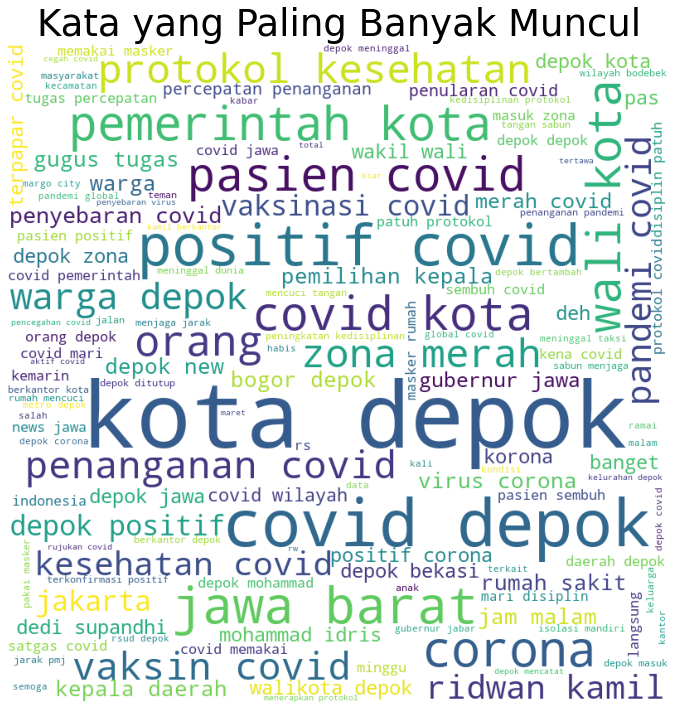

In [20]:
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10,10), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.title("Kata yang Paling Banyak Muncul", fontsize = 37)
plt.tight_layout(pad = 1) 
  
plt.show() 

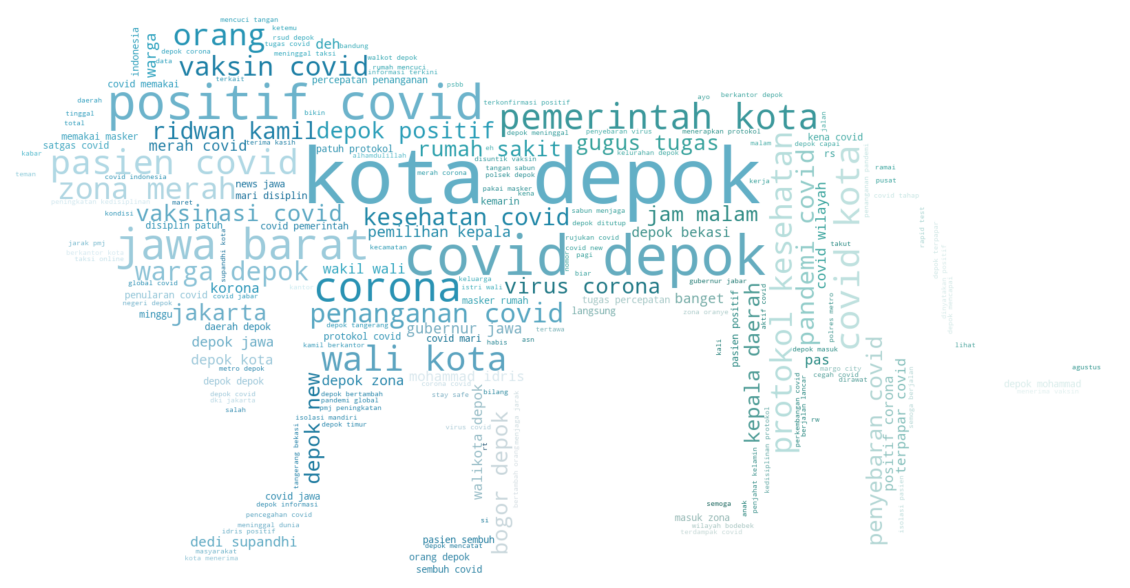

In [21]:
# Mengambil gambar dari website
Mask = np.array(Image.open(requests.get('http://clipart-library.com/images_k/animal-silhouette-painting/animal-silhouette-painting-7.png', stream = True).raw))

# Menggunakan warna dari gambar yang telah diambil
image_colors = ImageColorGenerator(Mask)

# Menggunakan fungsi wordcloud dan memasukkan ke dalam variabel wc 
wc = WordCloud(background_color = 'white', height = 3000, width = 5000, mask = Mask).generate(comment_words)

# Menentukan besarnya gambar
plt.figure(figsize = (20, 30))

# Menampilkan gambar sesuai dengan warna yang telah ada di dalam gambar
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "hamming")

plt.axis('off')
plt.show()

In [22]:
with open('sentimentword.txt', 'r') as data:
    for line in data :
        line.rstrip()
    plaintext = data.read()
    
plaintext = plaintext.replace(' ', ',')

with open('kata_sentimen_negatif.txt', 'r',encoding='utf-8-sig') as data:
    plaintext1 = data.read()
    plaintext1 = plaintext1.rstrip()
    
with open('kata_sentimen_positif.txt', 'r',encoding='utf-8-sig') as data:
    plaintext2 = data.read()
    plaintext2 = plaintext2.rstrip()

with open("kata_sentimen.txt", 'w') as f:
    f.write(plaintext + '\n')
    
with open("kata_sentimen_fix.txt", 'w') as f:
    f.write(plaintext + '\n')
    f.write(plaintext1 + '\n')
    f.write(plaintext2 + '\n')

with open("kata_sentimen_fix.txt", 'r') as f:
    sentifix = f.read()
sentifix = sentifix.replace(',', '\t')

with open("sentifix.txt", 'w') as f:
    f.write(sentifix + '\n')

In [24]:
kamus_sentimen = 'sentifix.txt'

def sentiment_dict(kamus_sentimen):
    ''' (file) -> dictionary
This method should take your sentiment file
and create a dictionary in the form {word: value}
'''    
    kamus = open(kamus_sentimen)
    scores = {} # initialize an empty dictionary
    for line in kamus:
        term, score = line.split("\t") # The file is comma-delimited. 
        scores[term] = int(score) # Convert the score to an integer.

    return scores

In [183]:
#sentiment = sentiment_dict(kamus_sentimen)

In [156]:
kamus = pd.read_csv('sentifix.txt', sep='\t', lineterminator='\n')
kamus

,\r
korona,-1.0
corona,-1.0
covid,-1.0
pandemi,-2.0
putus tali gantung,-2.0
...,...
vakansi,3.0
spesial,4.0
asrama,3.0
orisinal,3.0


In [158]:
kamus_dict = kamus.to_dict(orient='dict')
kamus_dict

{'\r': {'korona': -1.0,
  'corona': -1.0,
  'covid': -1.0,
  'pandemi': -5.0,
  'putus tali gantung': -2.0,
  'gelebah': 2.0,
  'gobar hati': -2.0,
  'tersentuh (perasaan)': -1.0,
  'isak': -5.0,
  'larat hati': -3.0,
  'nelangsa': -3.0,
  'remuk redam': -5.0,
  'tidak segan': 2.0,
  'gemar': 5.0,
  'tak segan': 2.0,
  'sesal': 1.0,
  'pengen': 3.0,
  'penghayatan': 3.0,
  'absorpsi': 3.0,
  'linu': 4.0,
  'salah benang': -1.0,
  'sakit': -5.0,
  'lara': -5.0,
  'zuhud': 2.0,
  'mencederai': -4.0,
  'mengingkari': -4.0,
  'maaf': 2.0,
  'mengkhianat': -4.0,
  'mencelakai': -5.0,
  'mulu': 2.0,
  'ngga': -2.0,
  'borong': 2.0,
  'lever': -2.0,
  'kasian': -3.0,
  'gamau': -4.0,
  'doang': 1.0,
  'pulas': 4.0,
  'abis': 1.0,
  'coba': 2.0,
  'kangen': 3.0,
  'kalau': -1.0,
  'maunya': -1.0,
  'seandainya': -1.0,
  'marilah': 1.0,
  'bener': 3.0,
  'yaudah': 1.0,
  'nggak': 1.0,
  'gatau': -1.0,
  'apaan': -4.0,
  'ngakak': -2.0,
  'atuh': -1.0,
  'sekali': -1.0,
  'menarik hati': 3.0,
  

In [178]:
import codecs

doc = codecs.open('sentifix.txt','rU','UTF-8') #open for reading with "universal" type set

kamus = pd.read_csv(doc, sep='\t', header=None)
kamus

,0,1
0,korona,-1
1,corona,-1
2,covid,-1
3,pandemi,-2
4,putus tali gantung,-2
...,...,...
10220,melarikan,3
10221,vakansi,3
10222,spesial,4
10223,asrama,3


In [179]:
kamus = kamus.set_index(0).T.to_dict('records')
kamus

C:\Users\Alfa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


[{'korona': -1,
  'corona': -1,
  'covid': -1,
  'pandemi': -5,
  'putus tali gantung': -2,
  'gelebah': 2,
  'gobar hati': -2,
  'tersentuh (perasaan)': -1,
  'isak': -5,
  'larat hati': -3,
  'nelangsa': -3,
  'remuk redam': -5,
  'tidak segan': 2,
  'gemar': 5,
  'tak segan': 2,
  'sesal': 1,
  'pengen': 3,
  'penghayatan': 3,
  'absorpsi': 3,
  'linu': 4,
  'salah benang': -1,
  'sakit': -5,
  'lara': -5,
  'zuhud': 2,
  'mencederai': -4,
  'mengingkari': -4,
  'maaf': 2,
  'mengkhianat': -4,
  'mencelakai': -5,
  'mulu': 2,
  'ngga': -2,
  'borong': 2,
  'lever': -2,
  'kasian': -3,
  'gamau': -4,
  'doang': 1,
  'pulas': 4,
  'abis': 1,
  'coba': 2,
  'kangen': 3,
  'kalau': -1,
  'maunya': -1,
  'seandainya': -1,
  'marilah': 1,
  'bener': 3,
  'yaudah': 1,
  'nggak': 1,
  'gatau': -1,
  'apaan': -4,
  'ngakak': -2,
  'atuh': -1,
  'sekali': -1,
  'menarik hati': 3,
  'cedayam': 2,
  'kece': 5,
  'termakan': 1,
  'belom': 1,
  'malem': -1,
  'mencekau': -2,
  'menduga': 3,
  'me

In [182]:
dct = {}
for item in kamus:
    dct.update(item)

dct

{'korona': -1,
 'corona': -1,
 'covid': -1,
 'pandemi': -5,
 'putus tali gantung': -2,
 'gelebah': 2,
 'gobar hati': -2,
 'tersentuh (perasaan)': -1,
 'isak': -5,
 'larat hati': -3,
 'nelangsa': -3,
 'remuk redam': -5,
 'tidak segan': 2,
 'gemar': 5,
 'tak segan': 2,
 'sesal': 1,
 'pengen': 3,
 'penghayatan': 3,
 'absorpsi': 3,
 'linu': 4,
 'salah benang': -1,
 'sakit': -5,
 'lara': -5,
 'zuhud': 2,
 'mencederai': -4,
 'mengingkari': -4,
 'maaf': 2,
 'mengkhianat': -4,
 'mencelakai': -5,
 'mulu': 2,
 'ngga': -2,
 'borong': 2,
 'lever': -2,
 'kasian': -3,
 'gamau': -4,
 'doang': 1,
 'pulas': 4,
 'abis': 1,
 'coba': 2,
 'kangen': 3,
 'kalau': -1,
 'maunya': -1,
 'seandainya': -1,
 'marilah': 1,
 'bener': 3,
 'yaudah': 1,
 'nggak': 1,
 'gatau': -1,
 'apaan': -4,
 'ngakak': -2,
 'atuh': -1,
 'sekali': -1,
 'menarik hati': 3,
 'cedayam': 2,
 'kece': 5,
 'termakan': 1,
 'belom': 1,
 'malem': -1,
 'mencekau': -2,
 'menduga': 3,
 'menyuarakan': 3,
 'memprediksi': 3,
 'membunyikan': 2,
 'menerk

In [ ]:
# kamus_dict = kamus.to_dict('dict')
# kamus_dict

In [124]:
# df['sentiment'] = df['cleaned_tweets'].apply(lambda tweet: TextBlob(tweet).sentiment)
# df1 = df.copy()

# # Membuat fungsi untuk mengategorikan tweet/text yang bermakna positif, negatif dan netral
# def categoriser(diction):
#     if(diction['neg']>0):
#         return("Negatif")
#     elif(diction['pos']>0):
#         return('Positif')
#     else:
#         return('Netral')
    
# # Membuat fungsi Sentimen Analyzer untuk mencari text yang mengandung sentimen negatif, positif dan netral
# def SentiAnalyzer(df):
#     analyser= SentimentIntensityAnalyzer()
#     #analysis = TextBlob(str(df.cleaned_tweets))
#     #an = analysis.translate(from_lang='id', to='en')
#     df['sentiment']=df['cleaned_tweets'].apply(lambda x: analyser.polarity_scores(x))
#     df['sentiment']=df['sentiment'].apply(lambda x:categoriser(x))
#     return df

In [32]:
'''def transl(df):
    #analyser= SentimentIntensityAnalyzer()
    analysis = TextBlob(str(df.cleaned_tweets))
    #df['english'] = analysis.translate(from_lang='id', to='en')
    an = analysis.translate(from_lang='id', to='en')
    print(len(an))
    #print(an)
    #df['english'] = print(an)#['cleaned_tweets'].apply(lambda x: analyser.polarity_scores(x))
    #df['sentiment']=df['sentiment'].apply(lambda x:categoriser(x))
    return df

df['cleaned_tweets2'] = df['cleaned_tweets'].apply(lambda x: transl(x))'''

"def transl(df):\n    #analyser= SentimentIntensityAnalyzer()\n    analysis = TextBlob(str(df.cleaned_tweets))\n    #df['english'] = analysis.translate(from_lang='id', to='en')\n    an = analysis.translate(from_lang='id', to='en')\n    print(len(an))\n    #print(an)\n    #df['english'] = print(an)#['cleaned_tweets'].apply(lambda x: analyser.polarity_scores(x))\n    #df['sentiment']=df['sentiment'].apply(lambda x:categoriser(x))\n    return df\n\ndf['cleaned_tweets2'] = df['cleaned_tweets'].apply(lambda x: transl(x))"

In [40]:
# Mengaplikasikan fungsi Analyzer ke dalam dataframe dan membuat dataframe df2
# df1 = SentiAnalyzer(df1)
# df1

,id,date,username,tweet,cleaned_tweets,sentiment
0,1365676988321566723,2021-02-27,akhdanrafif13,@literarybase Sebelum corona kira-kira bulan J...,corona januari beli buku gramed depok,Netral
1,1365631044053962755,2021-02-27,nabilaputri___,Ya allah malming jalanan jkt ke depok najis bg...,allah malming jalanan jakarta depok najis bang...,Netral
2,1365624310426001411,2021-02-27,ijulekeh,"Halo gaes, kalo ada yg butuh kerjaan dgn spesi...",halo gaes butuh kerjaan spesifikasi design mar...,Positif
3,1365609531825291264,2021-02-27,naito_asukabe,jalanan Depok terlihat macet lg apakah tandany...,jalanan depok macet tandanya situasi normal covid,Netral
4,1365605405057949701,2021-02-27,pajakdepokcmg,Dalam rangka upaya pencegahan penyebaran Covid...,rangka upaya pencegahan penyebaran covid pelay...,Netral
...,...,...,...,...,...,...
3027,1331856196043640832,2020-11-26,tempodotco,"Calon Wali Kota Depok nomor urut 02, Mohammad ...",calon wali kota depok nomor urut mohammad idri...,Netral
3028,1331856099239030786,2020-11-26,merdekadotcom,Satgas Lakukan Tracing Usai Cawalkot Depok Moh...,satgas lakukan tracing cawalkot depok mohammad...,Netral
3029,1331855779264008194,2020-11-26,rinjanijb,"Dalam posisi sbg ketua satgas covid Depok, kok...",posisi ketua satgas covid depok idris jaga kes...,Netral
3030,1331853984039018496,2020-11-26,sindonews,"Mohammad Idris, Petahana Pilkada Depok Positif...",mohammad idris petahana pemilihan kepala daera...,Netral


In [33]:
#df1['sentiment'].value_counts()

In [34]:
#df.tail()

In [15]:
#df.to_excel('output.xlsx')

In [15]:
# import twint
# import pandas as pd
# import tkinter as tk
# from tkinter import *
# from tkinter import filedialog
# import nest_asyncio
# nest_asyncio.apply()




# #source for functions available_columns() and twint_to_pandas():
# #https://towardsdatascience.com/analyzing-tweets-with-nlp-in-minutes-with-spark-optimus-and-twint-a0c96084995f
# def available_columns():
#     return twint.output.panda.Tweets_df.columns



# def twint_to_pandas(columns):
#     return twint.output.panda.Tweets_df[columns]

# def config():
#     c = twint.Config()
#     #c.Search = '#stephansdom'
#     c.Format = 'Username: {username} | Tweet: {tweet}'
#     c.Since = '2019-02-01'
#     c.Until = '2020-02-08'# yy-mm-dd
#     c.Limit=5000
#     c.Pandas = True
#     return  c



# def searchStephansdom():
#     # configure
#     c = config()
#     c.Search = '#stephansdom #vienna'

#     # Run Search
#     twint.run.Search(c)
#     df_sd = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes","link"])

#     #print(df_sd['username'].nunique())
#     #df_vienna = pd.DataFrame
#     #vienna = 'wien|vienna|Wien|Vienna'
#     global df_sd_vienna
#     df_sd_vienna = df_sd#[df_sd['tweet'].str.contains(vienna)]
#     #df_sd_vienna = df_vienna
#     #print(df_vienna['username'].nunique())

# def searchSchonbrunn():
#     c = config()
#     c.Search = '#schonbrunn #vienna OR #schönbrunn #vienna'

#     # Run Search
#     twint.run.Search(c)
#     df_sb = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes","link"])

#     #print(df_sb['username'].nunique())
#     #df_vienna = pd.DataFrame
#     #vienna = 'wien|vienna|Wien|Vienna'
#     global  df_sb_vienna
#     df_sb_vienna = df_sb#[df_sb['tweet'].str.contains(vienna)]

#     #print(df_vienna['username'].nunique())

# def searchBelvedere():
#     c = config()
#     c.Search = '#belvedere #vienna'

#     # Run Search
#     twint.run.Search(c)
#     df_sb = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes","link"])

#     #print(df_sb['username'].nunique())
#     #df_vienna = pd.DataFrame
#     #vienna = 'wien|vienna|Wien|Vienna'
#     global df_bv_vienna
#     df_bv_vienna = df_sb#[df_sb['tweet'].str.contains(vienna)]



#     #print(df_vienna['username'].nunique())

# def searchRathaus():
#     c = config()
#     c.Search = '#rathaus #vienna'

#     # Run Search
#     twint.run.Search(c)
#     df_sb = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes","link"])

#     #print(df_sb['username'].nunique())
#     #df_vienna = pd.DataFrame
#     #vienna = 'wien|vienna|Wien|Vienna'
#     global df_rh_vienna
#     df_rh_vienna = df_sb#[df_sb['tweet'].str.contains(vienna)]


#     #print(df_vienna['username'].nunique())


# def searchHwHaus():
#     c = config()
#     c.Search = '#hundertwasserhaus #vienna'

#     # Run Search
#     twint.run.Search(c)
#     df_sb = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes","link"])

#     #print(df_sb['username'].nunique())
#     #df_vienna = pd.DataFrame
#     #vienna = 'wien|vienna|Wien|Vienna'
#     global df_hw_vienna
#     df_hw_vienna = df_sb#[df_sb['tweet'].str.contains(vienna)]


#     #print(df_vienna['username'].nunique())


# def searchOpera():
#     c = config()
#     c.Search = '#opera #vienna'

#     # Run Search
#     twint.run.Search(c)
#     df_sb = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes","link"])

#     #print(df_sb['username'].nunique())
#     #df_vienna = pd.DataFrame
#     #vienna = 'wien|vienna|Wien|Vienna'
#     global df_op_vienna
#     df_op_vienna = df_sb#[df_sb['tweet'].str.contains(vienna)]


#     #print(df_vienna['username'].nunique())





# #source for csvSaver() and exportCSV() - not used:
# #https://datatofish.com/export-dataframe-to-csv/
# def csvSaver():
#     root = tk.Tk()

#     canvas1 = tk.Canvas(root, width=300, height=300, bg='lightsteelblue2', relief='raised')
#     canvas1.pack()
#     saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white',
#                              font=('helvetica', 12, 'bold'))
#     canvas1.create_window(150, 150, window=saveAsButton_CSV)

#     root.mainloop()

# def exportCSV():
#     global df_pd

#     export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
#     df_pd.to_csv(export_file_path, index=None, header=True)
    